<a href="https://colab.research.google.com/github/prunojumah/independent_project_week_13/blob/main/Independent__Project_Week_13a_Pruno_Jumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Research Problem

## Specifying research question

The main aim of this project is to determine which group of individuals are more likely to click on an add of a cryptography course offered by a Kenyan entrepreneur.
The project is done in R.

## Defining the metrics of success

The project will be deemed a success if  I can accuractely create a supervised learning model to help identify which individuals are most likely to click on the ads in the blog. 

## Understanding the context

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads. We are also tasked to create a supervised learning model to help identify which individuals are most likely to click on the ads in the blog.

## Experimental design

Problem Definition

Data Sourcing

Check the Data

Perform Data Cleaning

Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)

Implement the Solution

Challenge the Solution

Conclusions

## Data relevance

The data available is sufficient to answer the research question.

## Importing and loading the relevant libraries

In [ ]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("magrittr")
library(magrittr)
install.packages("caret")
library(caret)
install.packages("ggcorrplot")
library(ggcorrplot)
install.packages("ggExtra")
library(ggExtra)
theme_set(theme_classic())
options(warn = -1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘colourpicker’, ‘miniUI’, ‘shiny’, ‘shinyjs’




In [ ]:
install.packages("psych")
library(psych)
install.packages("ggplot2")
library(ggplot2)
install.packages("pander")
library(pander)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("earth")
library(earth)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plotrix’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’


Loading required package: Formula

Loading required package: plotmo

Loading required package: plotrix


Attaching package: ‘plotrix’


The following object is masked from ‘package:psych’:

    rescale


Loading required package: TeachingDemos



In [ ]:
# Previewing the head of the dataset

df = read_csv("/content/advertising.csv")
head(df)


── Column specification ────────────────────────────────────────────────────────
cols(
  `Daily Time Spent on Site` = col_double(),
  Age = col_double(),
  `Area Income` = col_double(),
  `Daily Internet Usage` = col_double(),
  `Ad Topic Line` = col_character(),
  City = col_character(),
  Male = col_double(),
  Country = col_character(),
  Timestamp = col_datetime(format = ""),
  `Clicked on Ad` = col_double()
)




Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
# Previewing the tail of the dataset

tail(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [ ]:
# Checking the class type of the loaded file

class(df)
# Changing loaded file to dataframe

df = as.data.frame(df)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [ ]:
# Taking a glimpse on some of the data in the 

glimpse(df)

Rows: 1,000
Columns: 10
$ `Daily Time Spent on Site` <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, …
$ Age                        <dbl> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49…
$ `Area Income`              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73…
$ `Daily Internet Usage`     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 22…
$ `Ad Topic Line`            <chr> "Cloned 5thgeneration orchestration", "Mon…
$ City                       <chr> "Wrightburgh", "West Jodi", "Davidton", "W…
$ Male                       <dbl> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, …
$ Country                    <chr> "Tunisia", "Nauru", "San Marino", "Italy",…
$ Timestamp                  <dttm> 2016-03-27 00:53:11, 2016-04-04 01:39:02,…
$ `Clicked on Ad`            <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, …


In [ ]:
# Checking some statistical summaries of the data

summary(df)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad Topic Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

In [ ]:
names(df)

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

In [ ]:
# Checking the dimension of the dataset

dim(df)

# The dataset has 1000 entries and 10 columns

[1] 1000   10

In [ ]:
# Renaming columns to lower and replacing spaces with an underscore for uniformity

colnames(df) = tolower(str_replace_all(colnames(df), c(' ' = '_')))

# Checking whether the column names have been renamed appriopriately

print(colnames(df))

 [1] "daily_time_spent_on_site" "age"                     
 [3] "area_income"              "daily_internet_usage"    
 [5] "ad_topic_line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked_on_ad"           


In [ ]:
# Checking the datatypes for each column

columns = colnames(df)
for (column in seq(length(colnames(df)))){
    print(columns[column])
    print(class(df[, column]))
    cat('\n')
}

[1] "daily_time_spent_on_site"
[1] "numeric"

[1] "age"
[1] "numeric"

[1] "area_income"
[1] "numeric"

[1] "daily_internet_usage"
[1] "numeric"

[1] "ad_topic_line"
[1] "character"

[1] "city"
[1] "character"

[1] "male"
[1] "numeric"

[1] "country"
[1] "character"

[1] "timestamp"
[1] "POSIXct" "POSIXt" 

[1] "clicked_on_ad"
[1] "numeric"



In [ ]:
# The male column should be renamed to gender

colnames(df)[colnames(df) == 'male'] = 'gender'

In [ ]:
# Changing column names to their appriopriate data type
# Creating a lists of categorical and numerical columns 

cat_cols = c("ad_topic_line", "city", "gender", "country", "clicked_on_ad" )

num_cols = c("daily_time_spent_on_site", "age", "area_income", "daily_internet_usage")

# Switching columns to factors
df[,cat_cols] %<>% lapply(function(x) as.factor(as.character(x)))

In [ ]:
# Checking whether the datatypes for each column have been changed apprippriately

columns = colnames(df)
for (column in seq(length(colnames(df)))){
    print(columns[column])
    print(class(df[, column]))
    print(nlevels(df[, column]))
    cat('\n')
}

# 969 unique cities in the dataset.
# 237 inique counties in the dataset

[1] "daily_time_spent_on_site"
[1] "numeric"
[1] 0

[1] "age"
[1] "numeric"
[1] 0

[1] "area_income"
[1] "numeric"
[1] 0

[1] "daily_internet_usage"
[1] "numeric"
[1] 0

[1] "ad_topic_line"
[1] "factor"
[1] 1000

[1] "city"
[1] "factor"
[1] 969

[1] "gender"
[1] "factor"
[1] 2

[1] "country"
[1] "factor"
[1] 237

[1] "timestamp"
[1] "POSIXct" "POSIXt" 
[1] 0

[1] "clicked_on_ad"
[1] "factor"
[1] 2



## Data Cleaning

In [ ]:
# Checking for missing values in each column

colSums(is.na(df))

# There are no missing values in the dataset

daily_time_spent_on_site                      age              area_income 
                       0                        0                        0 
    daily_internet_usage            ad_topic_line                     city 
                       0                        0                        0 
                  gender                  country                timestamp 
                       0                        0                        0 
           clicked_on_ad 
                       0

In [ ]:
# Checking for duplicates in the dataset using a boolean

any(duplicated(df))

# There are no duplicated entries in the dataset

[1] FALSE

In [ ]:
# Frequency tables

table(df$gender)
table(df$clicked_on_ad)

# The data is fairly balanced.


  0   1 
519 481 


  0   1 
500 500 

In [ ]:
# Renaming the target variable to appriopriate R names

levels(df$clicked_on_ad) = c("Yes", "No")

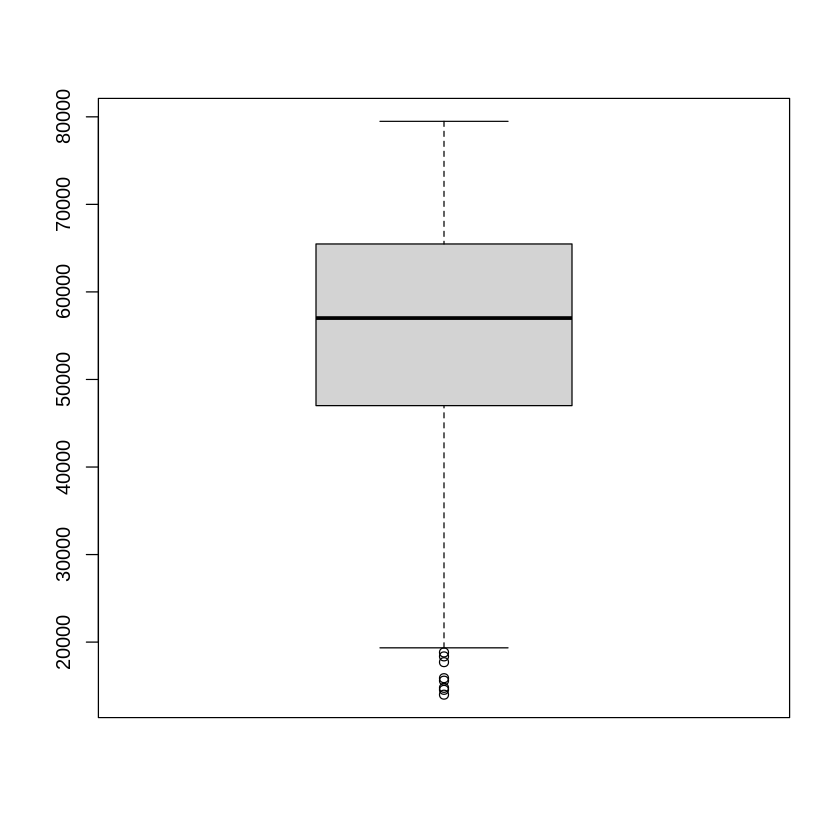

In [ ]:
# Checking for outliers using boxplots

boxplot(df$area_income)

# There are a few outliers in the area income column
# and a  majority of the individuals are high income earners

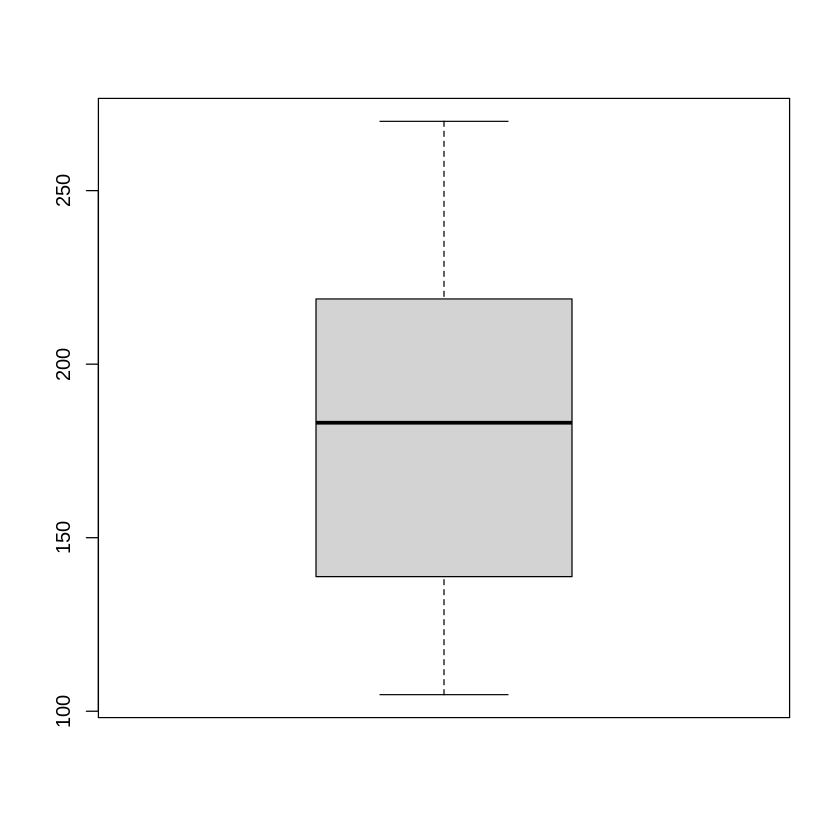

In [ ]:
# Checking for outliers using boxplots

boxplot(df$daily_internet_usage)

# No outliers in this column

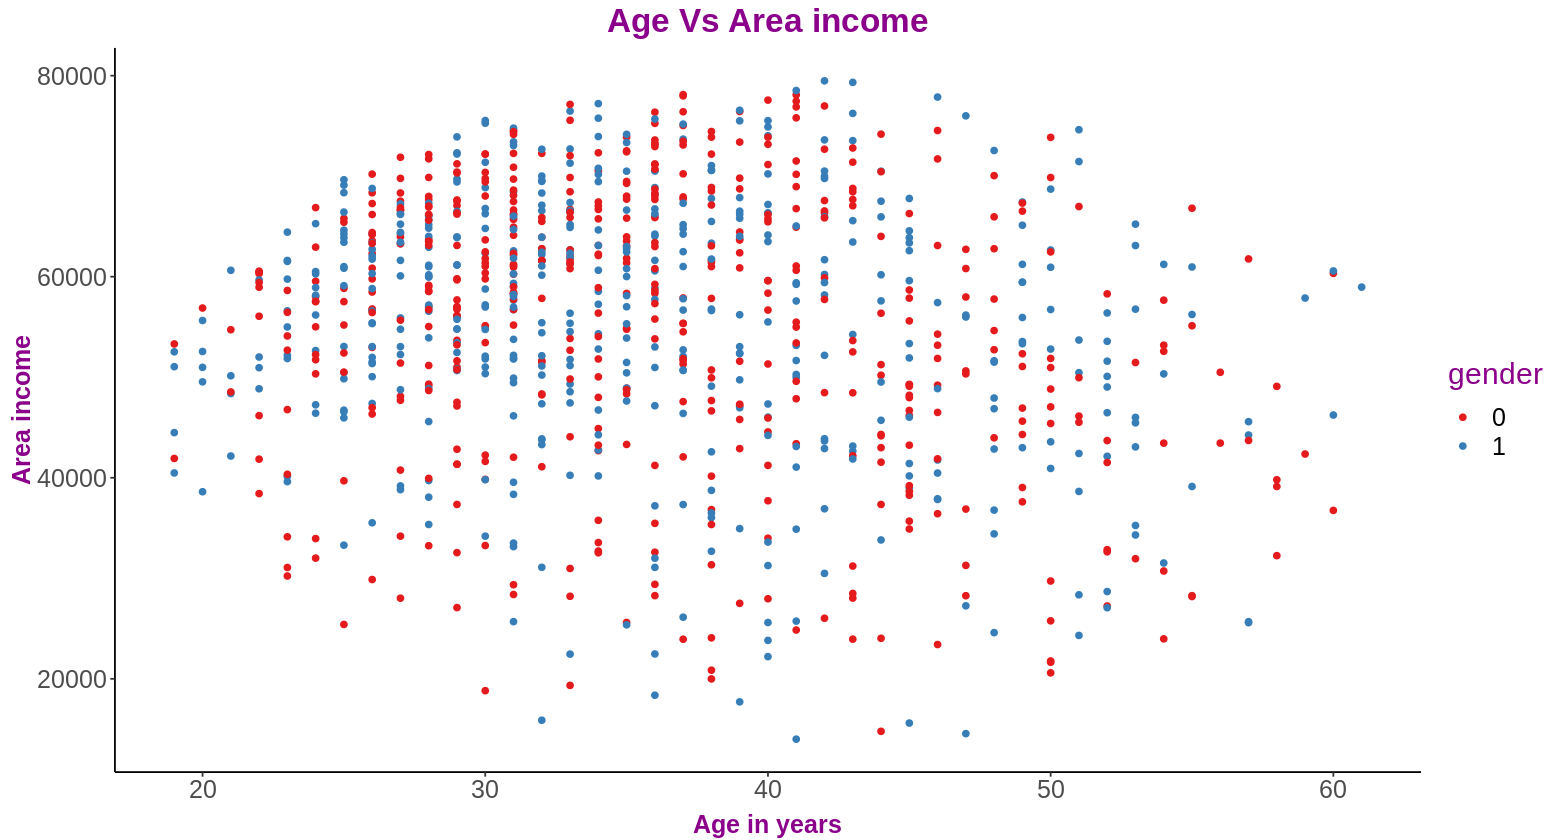

In [ ]:
# Plotting a scatter plot of age vs income

options(repr.plot.width = 13, repr.plot.height = 7)
gg = ggplot(data = df, aes(x = age, y = area_income, col = gender)) + 
    geom_point() + 
    labs(title = 'Age Vs Area income', x = 'Age in years', y = 'Area income') + 
    scale_color_brewer(palette = 'Set1') +
    theme(plot.title=element_text(size=20, face="bold", color="darkmagenta",hjust=0.5, lineheight=1.2), 
          plot.subtitle=element_text(size=15, face="bold", hjust=0.5),
         axis.title.x = element_text(color = 'darkmagenta', size = 15, face = 'bold', vjust = -0.5),
         axis.title.y = element_text(color = 'darkmagenta', size = 15, face = 'bold', vjust = 0.5),
         axis.text.y = element_text(size = 15),axis.text.x = element_text(size = 15),
         legend.title = element_text(size = 18, color = 'darkmagenta'),
        legend.text = element_text(size = 15))
plot(gg)

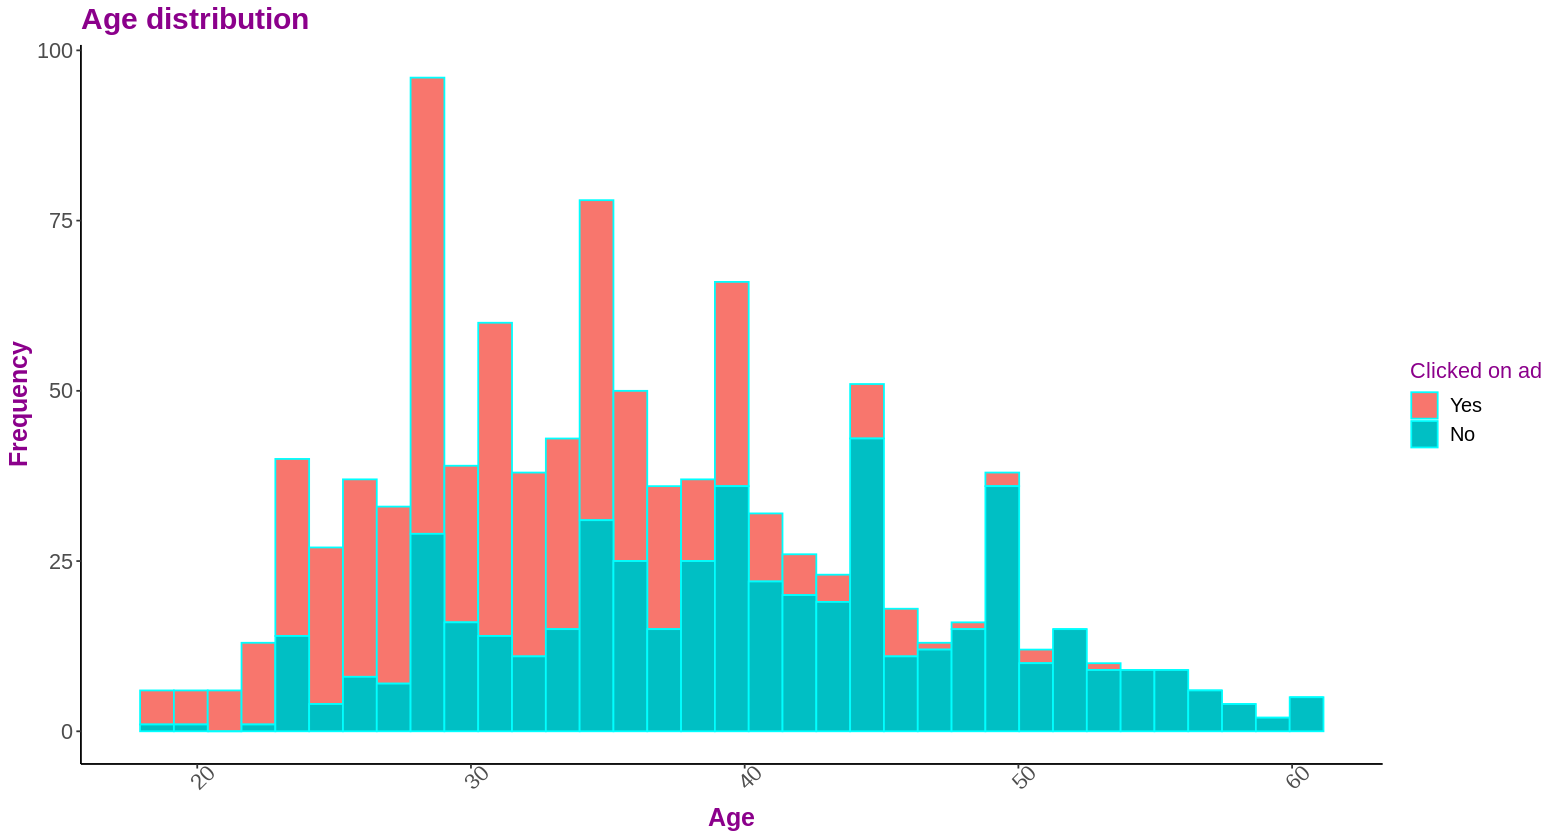

In [ ]:
# Plotting a a pair of histograms

options(repr.plot.width = 13, repr.plot.height = 7)
ggplot(data = df, aes(x = age, fill = clicked_on_ad))+
    geom_histogram(bins = 35, color = 'cyan') + 
    labs(title = 'Age distribution', x = 'Age', y = 'Frequency', fill = 'Clicked on ad') +
        scale_color_brewer(palette = 'Set1') +
        theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13, angle = 45),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))

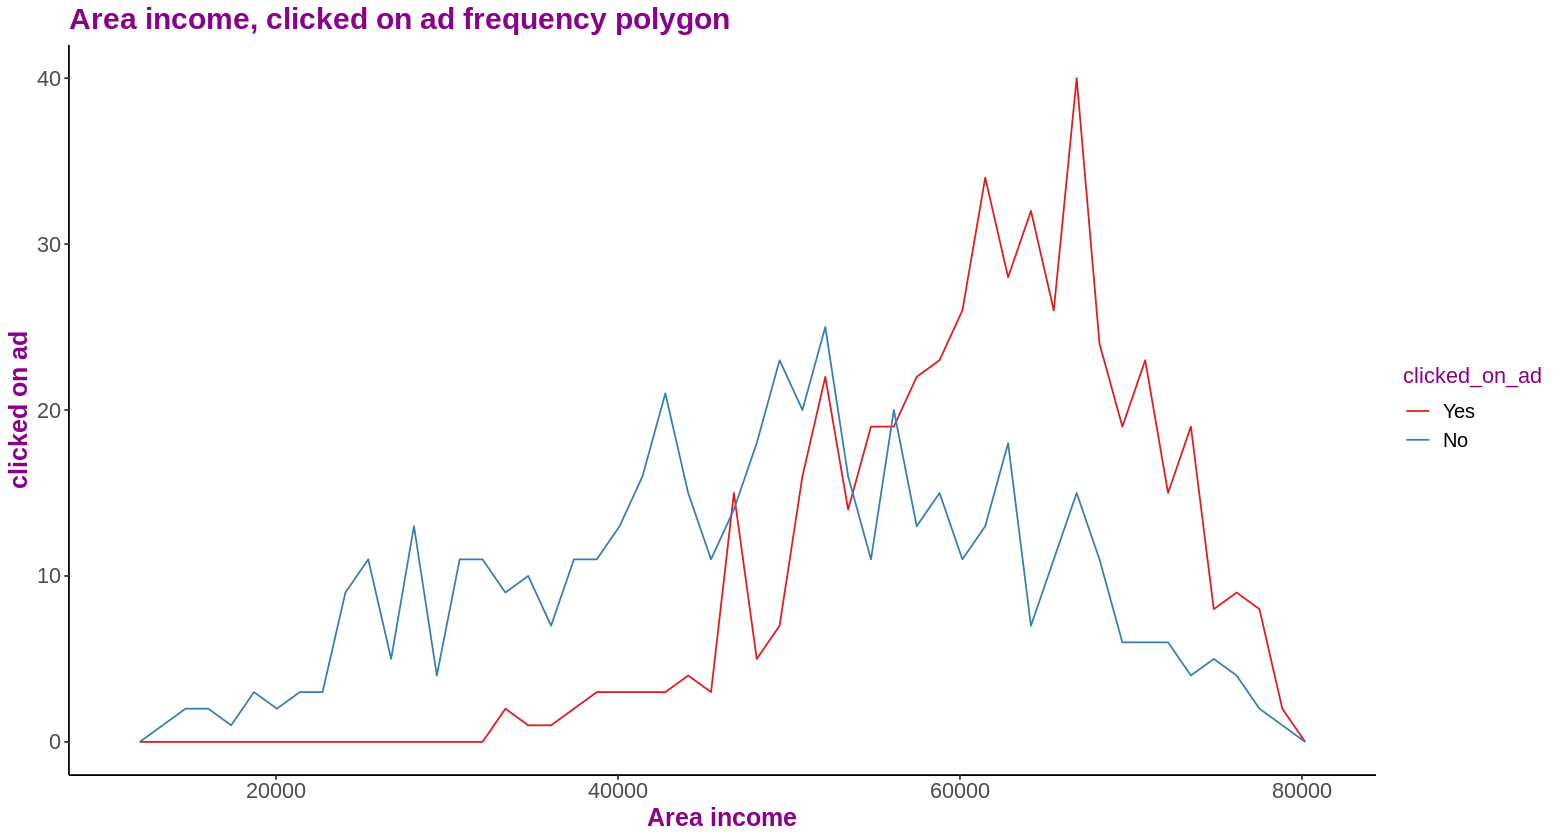

In [ ]:
# Frequency polygon

options(repr.plot.width = 13, repr.plot.height = 7)
ggplot(data = df, aes(x = area_income, col = clicked_on_ad))+
    geom_freqpoly(bins = 50)+
    labs(title = 'Area income, clicked on ad frequency polygon', x = 'Area income', y = 'clicked on ad', fill = 'Clicked on ad') +
        scale_color_brewer(palette = 'Set1') +
        theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))

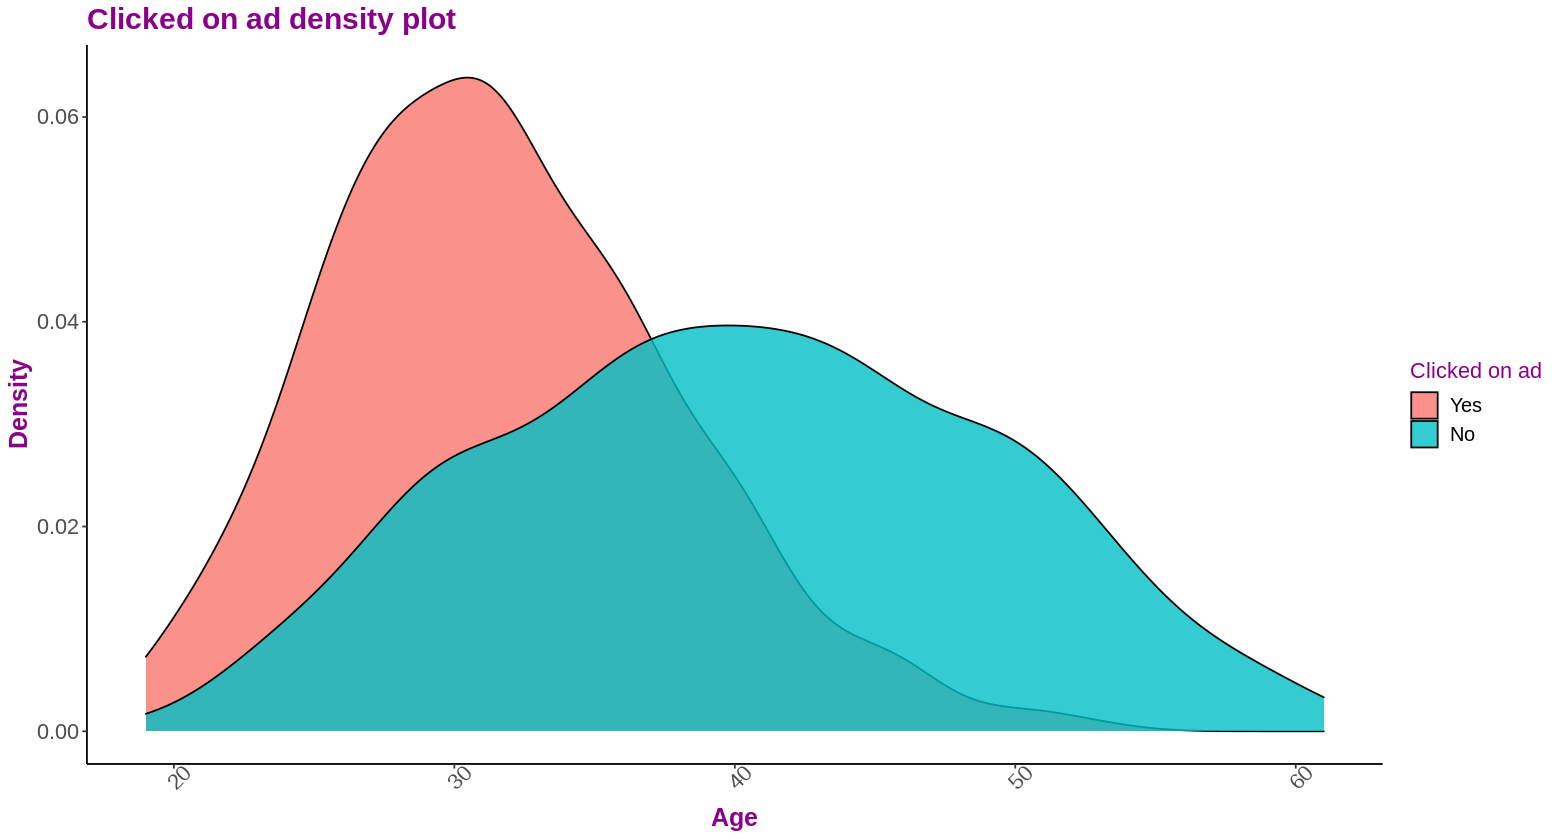

In [ ]:
# Plotting density plot

options(repr.plot.width = 13, repr.plot.height = 7)
p1 = ggplot(data = df, aes(age)) +
        geom_density(aes(fill=factor(clicked_on_ad)), alpha = 0.8) +
        labs(title = 'Clicked on ad density plot', x = 'Age', y = 'Density', fill = 'Clicked on ad') +
        scale_color_brewer(palette = 'cool') +
        theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13, angle = 45),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))
plot(p1)

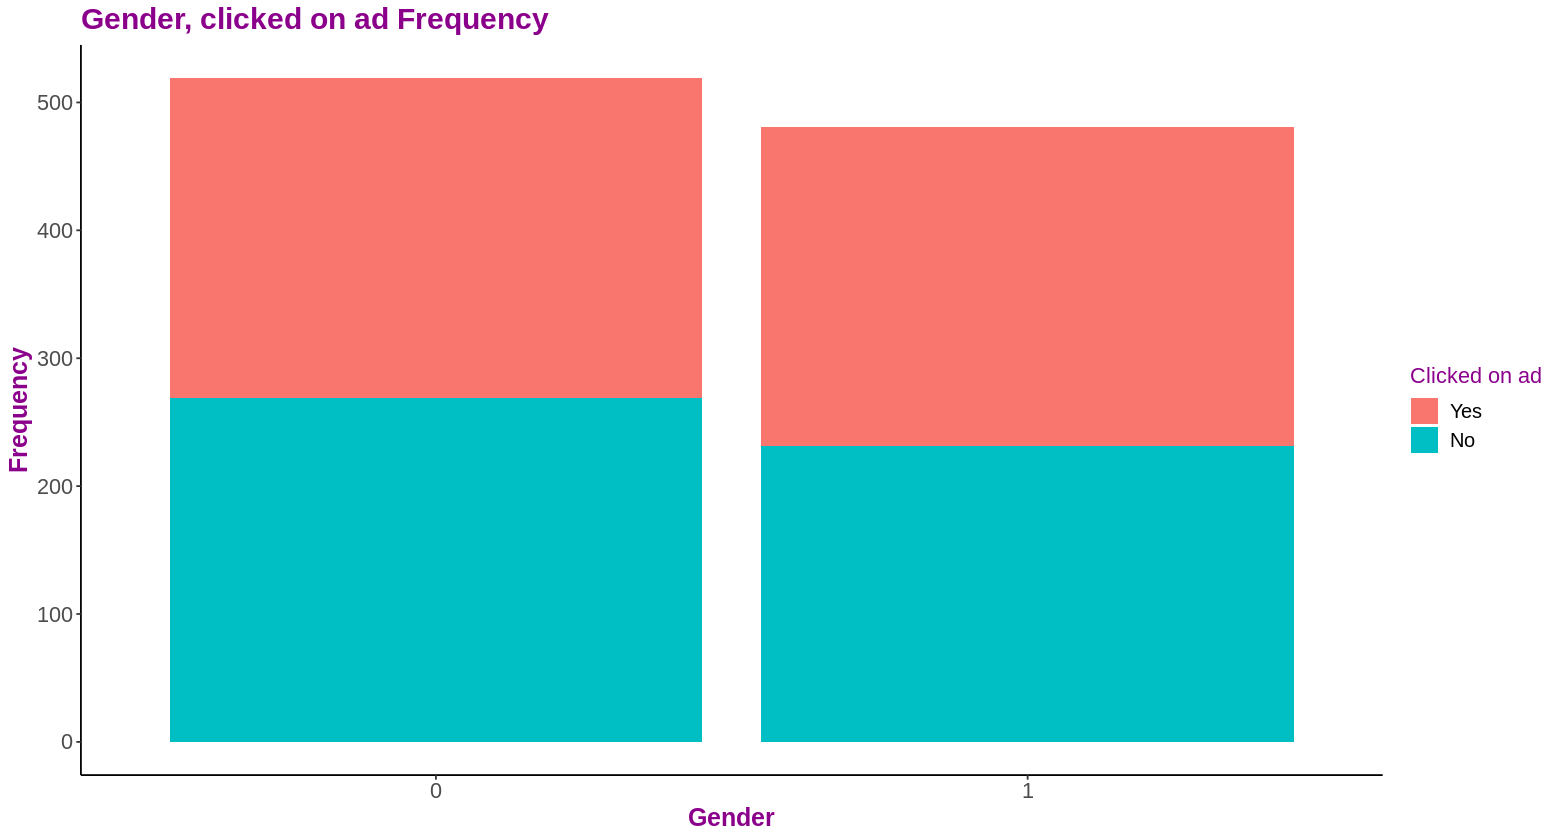

In [ ]:
# Bar chart to check frequencies of features

options(repr.plot.width = 13, repr.plot.height = 7)
ggplot(data = df, aes(x = gender))+
    geom_bar(aes(fill = clicked_on_ad))+
    labs(title = 'Gender, clicked on ad Frequency', y = 'Frequency', x = 'Gender', fill = 'Clicked on ad') +
    scale_color_brewer(palette = 'cool') +
    theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



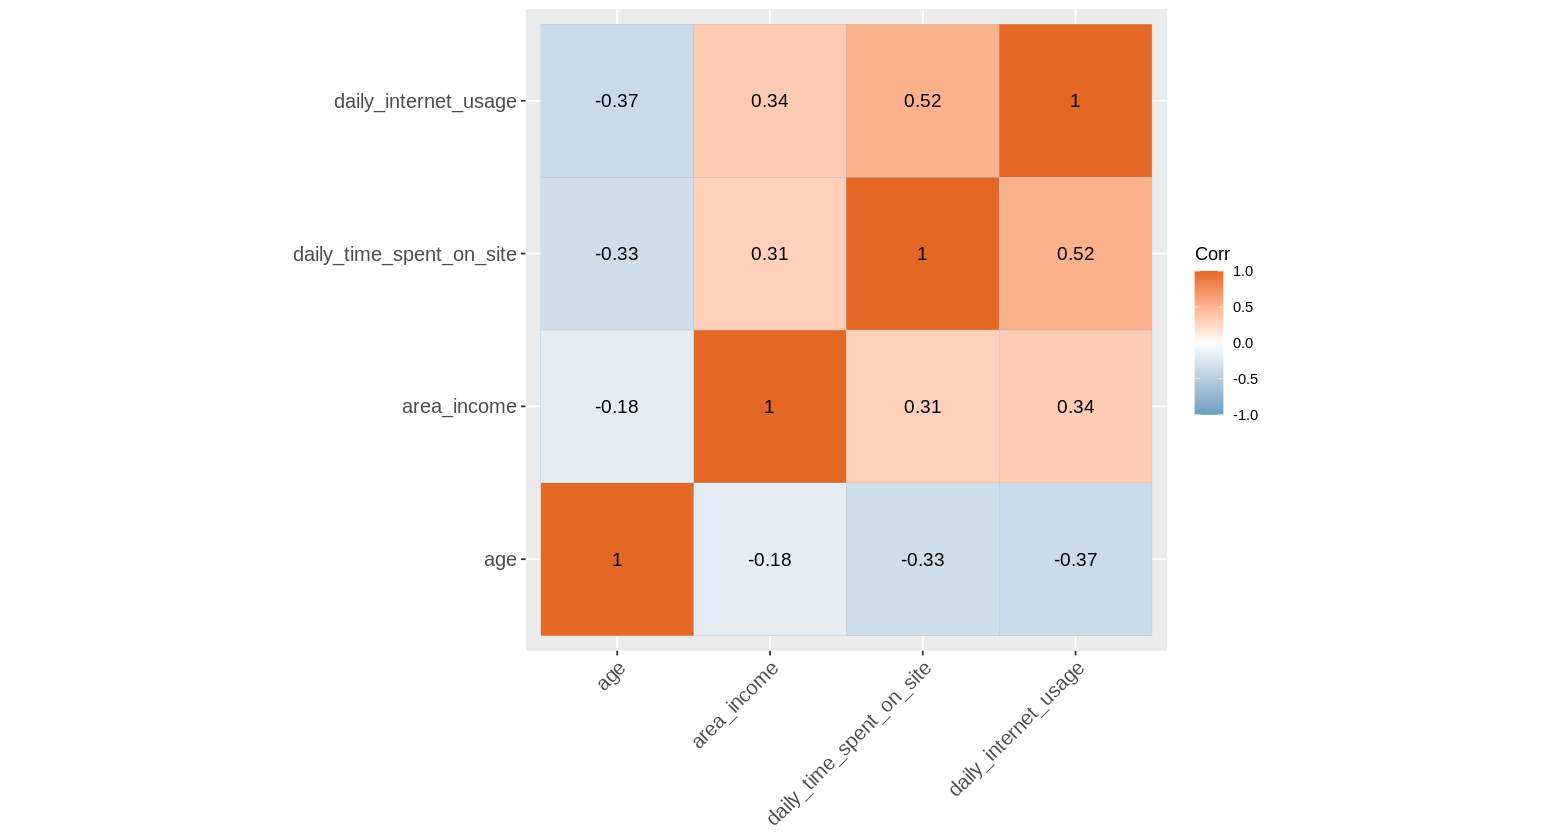

In [ ]:
# Checking the correlation coefficients for numeric variables

install.packages("ggcorrplot")
library(ggcorrplot)
corr = round(cor(select_if(df, is.numeric)), 2)
ggcorrplot(corr, hc.order = T, ggtheme = ggplot2::theme_gray,
   colors = c("#6D9EC1", "white", "#E46726"), lab = T)

### Implementing the solution


In [ ]:
# Splitting the data into training and testing sets
# Setting the seed to 100, for reproducibility

set.seed(100)

# Selecting only columns that are relevant to modeling
mod_cols = c('daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage', 'gender', 'clicked_on_ad')
df = select(df, all_of(mod_cols))

# Splitting the data into 80% training and 20% testing
train_rows = createDataPartition(df$clicked_on_ad, p=0.8, list=FALSE)

# Creating the training  dataset
train = df[train_rows,]

# Creating the test dataset
test = df[-train_rows,]

# Creating the  X and Y variables
x = train
y = train$clicked_on_ad

In [ ]:
# Training the model

install.packages("e1071")
library(e1071)

model = train(clicked_on_ad ~ ., data = train, method = 'earth')

# Making predictions using the training set
pred = predict(model)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Displaying the parameters and their values in the model

model

Multivariate Adaptive Regression Spline 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 800, 800, 800, 800, 800, 800, ... 
Resampling results across tuning parameters:

  nprune  Accuracy   Kappa    
   2      0.9005264  0.8008146
   6      0.9595874  0.9190606
  11      0.9592167  0.9182927

Tuning parameter 'degree' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were nprune = 6 and degree = 1.

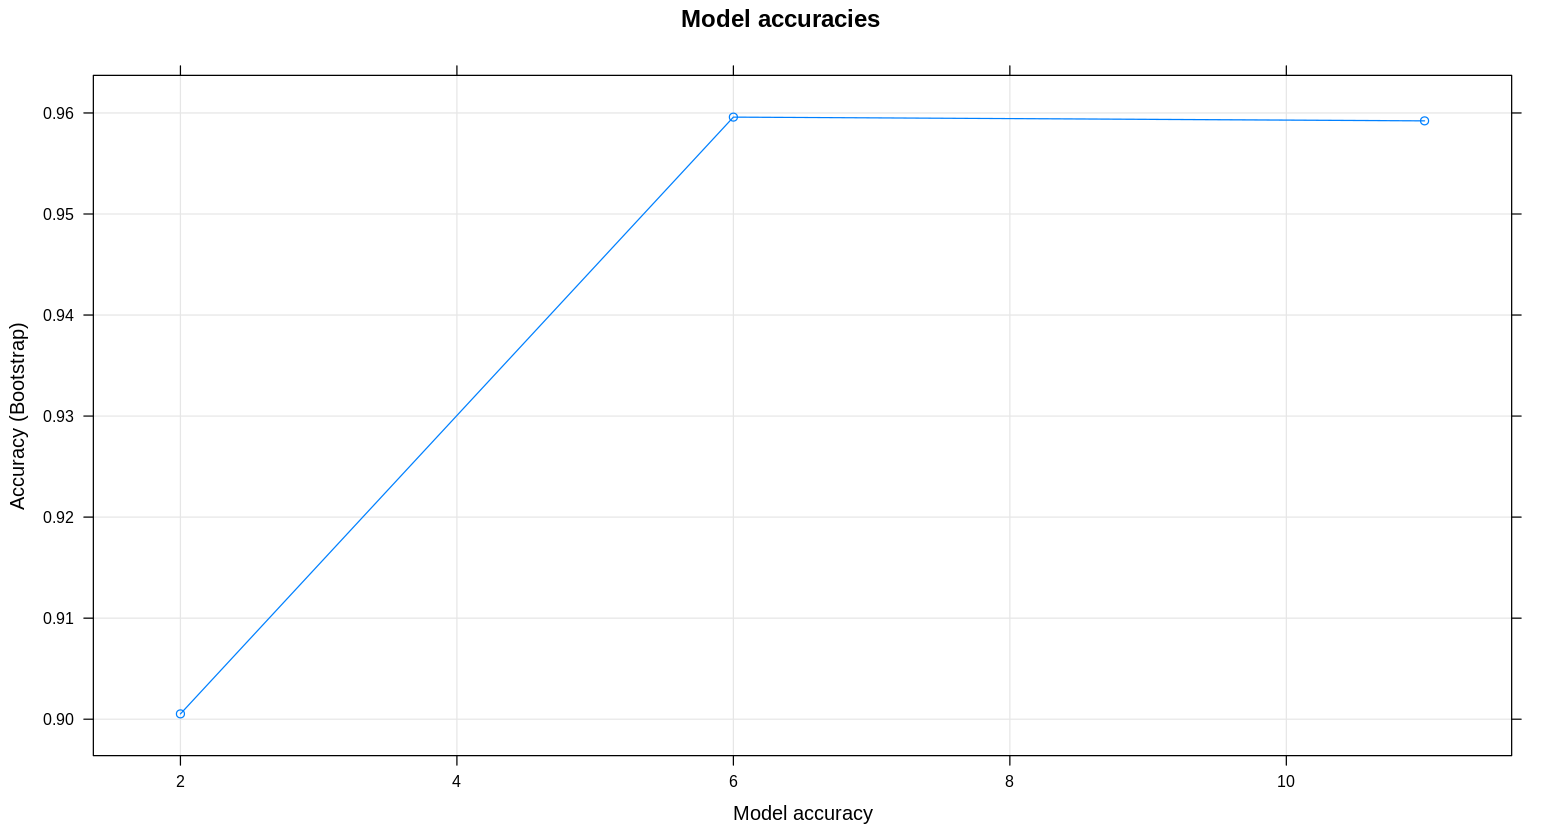

In [ ]:
# Plotting the model to show various iterations of the hyperparameters 

plot(model, main = 'Model accuracies', xlab = 'Model accuracy')

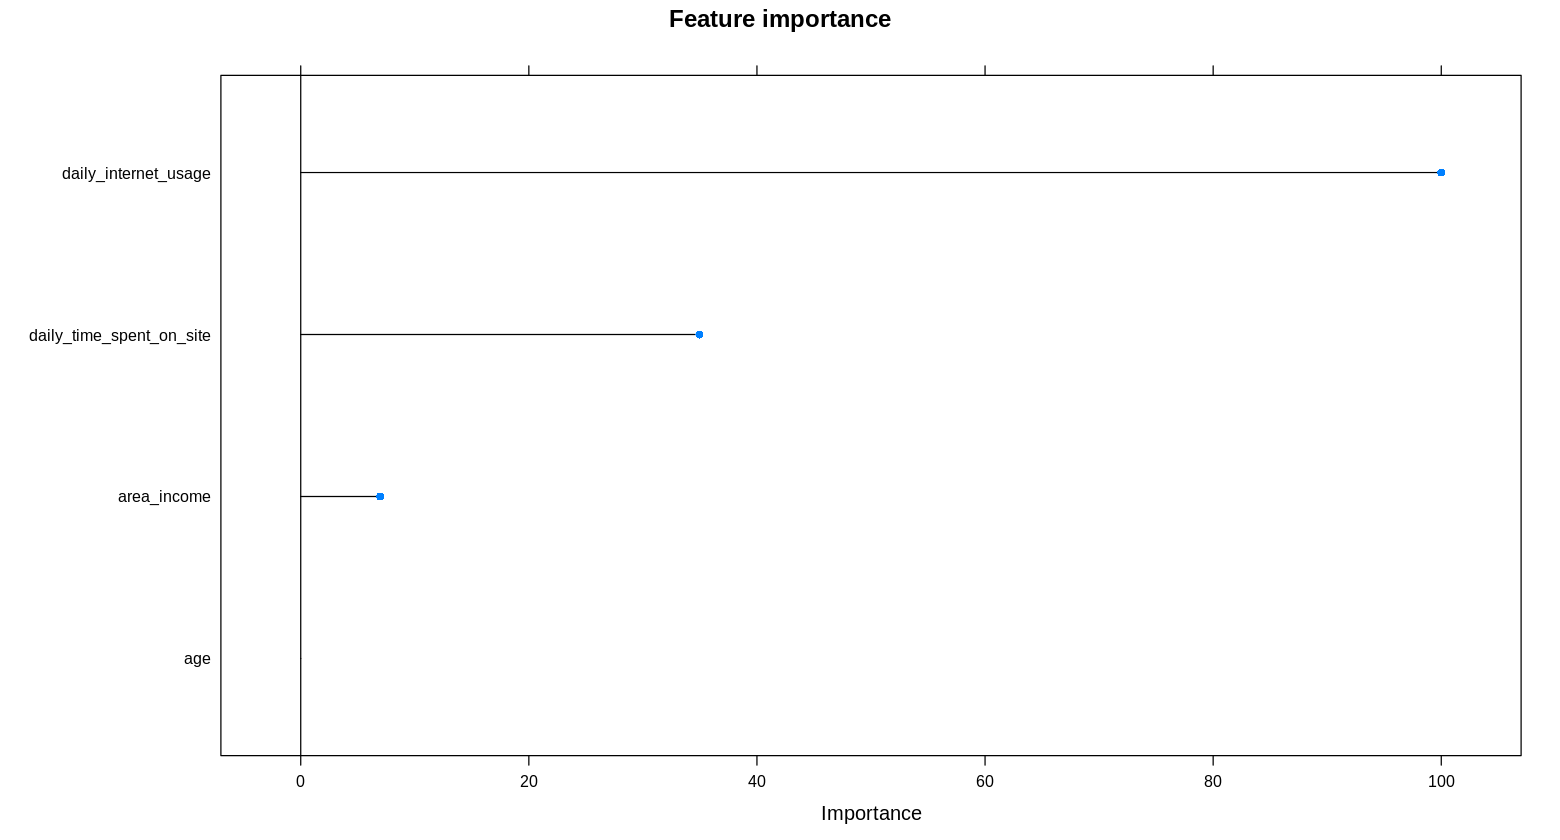

In [ ]:
# Checking which features were important in predicting the target variable
important_features = varImp(model)

# Plotting feature importance
plot(important_features, main = 'Feature importance')

# The order of the important features is given above
# 1. daily internet usage
# 2. daily time spent on site
# 3. area income
# 4. age

In [ ]:
# Previewing the first five predictions

y_pred = predict(model, test)
head(y_pred)

[1] Yes Yes No  Yes No  No 
Levels: Yes No

In [ ]:
# Displaying the confusion matrix

confusionMatrix(reference = test$clicked_on_ad, data = y_pred, mode='everything', positive = 'Yes')

Confusion Matrix and Statistics

          Reference
Prediction Yes No
       Yes  98  3
       No    2 97
                                          
               Accuracy : 0.975           
                 95% CI : (0.9426, 0.9918)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9800          
            Specificity : 0.9700          
         Pos Pred Value : 0.9703          
         Neg Pred Value : 0.9798          
              Precision : 0.9703          
                 Recall : 0.9800          
                     F1 : 0.9751          
             Prevalence : 0.5000          
         Detection Rate : 0.4900          
   Detection Prevalence : 0.5050          
      Balanced Accuracy : 0.9750 

In [ ]:
# Defining the training control

fitControl <- trainControl(
    method = 'cv',                   # k-fold cross validation
    number = 5,                      # number of folds
    savePredictions = 'final',       # saves predictions for optimal tuning parameter
    classProbs = T,                  # should class probabilities be returned
    summaryFunction=twoClassSummary  # results summary function
) 

# Tuning the hyper parameters by setting tuneLength

set.seed(100)
model_2 = train(clicked_on_ad ~ ., data=train, method='earth', tuneLength = 5, metric='accuracy', trControl = fitControl)
model_2

# Predict the test data and computing the confusion matrix

y_pred_2 <- predict(model_2, test)
confusionMatrix(reference = test$clicked_on_ad, data = y_pred_2, mode='everything', positive='Yes')

Multivariate Adaptive Regression Spline 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results across tuning parameters:

  nprune  ROC        Sens    Spec  
   2      0.9539062  0.9100  0.8900
   4      0.9787969  0.9675  0.9300
   6      0.9869375  0.9750  0.9500
   8      0.9873125  0.9650  0.9525
  11      0.9872188  0.9700  0.9575

Tuning parameter 'degree' was held constant at a value of 1
ROC was used to select the optimal model using the largest value.
The final values used for the model were nprune = 8 and degree = 1.

Confusion Matrix and Statistics

          Reference
Prediction Yes No
       Yes  98  3
       No    2 97
                                          
               Accuracy : 0.975           
                 95% CI : (0.9426, 0.9918)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9800          
            Specificity : 0.9700          
         Pos Pred Value : 0.9703          
         Neg Pred Value : 0.9798          
              Precision : 0.9703          
                 Recall : 0.9800          
                     F1 : 0.9751          
             Prevalence : 0.5000          
         Detection Rate : 0.4900          
   Detection Prevalence : 0.5050          
      Balanced Accuracy : 0.9750 

In [ ]:
# Hyperparameter tuning

# Defining gthe parameters to tune
params = expand.grid(nprune = c(2, 4, 6, 8, 10), 
                        degree = c(1, 2, 3))

# Tuning hyper parameters by setting tuneGrid
set.seed(100)
model_3 = train(clicked_on_ad ~ ., data=train, method='earth', metric='accuracy', tuneGrid = params, trControl = fitControl)
model_3

# Predicting the test set and computing the confusion matrix
y_pred_3 = predict(model_3, test)
confusionMatrix(reference = test$clicked_on_ad, data = y_pred_3, mode='everything', positive='Yes')

Multivariate Adaptive Regression Spline 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results across tuning parameters:

  degree  nprune  ROC        Sens    Spec  
  1        2      0.9539062  0.9100  0.8900
  1        4      0.9787969  0.9675  0.9300
  1        6      0.9869375  0.9750  0.9500
  1        8      0.9873125  0.9650  0.9525
  1       10      0.9870937  0.9675  0.9500
  2        2      0.9535938  0.9125  0.8900
  2        4      0.9843594  0.9600  0.9400
  2        6      0.9856875  0.9625  0.9425
  2        8      0.9860156  0.9725  0.9500
  2       10      0.9862344  0.9700  0.9525
  3        2      0.9535938  0.9125  0.8900
  3        4      0.9856250  0.9700  0.9500
  3        6      0.9876406  0.9700  0.9450
  3        8      0.9880625  0.9600  0.9525
  3       10      0.9861250  0.9725  0.9525

ROC was used to select the optimal model using t

Confusion Matrix and Statistics

          Reference
Prediction Yes No
       Yes  96  3
       No    4 97
                                          
               Accuracy : 0.965           
                 95% CI : (0.9292, 0.9858)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.93            
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9600          
            Specificity : 0.9700          
         Pos Pred Value : 0.9697          
         Neg Pred Value : 0.9604          
              Precision : 0.9697          
                 Recall : 0.9600          
                     F1 : 0.9648          
             Prevalence : 0.5000          
         Detection Rate : 0.4800          
   Detection Prevalence : 0.4950          
      Balanced Accuracy : 0.9650 

## Challenging the solution

In [ ]:
# The following models have been used to challenge the solution;

# 1. Adaboost
# 2. Random forest
# 3. Support vector machine

# 1. Adaboost

install.packages("fastAdaboost")
library("fastAdaboost")
set.seed(100)

# Training the model using adaboost
model_adaboost = train(clicked_on_ad ~ ., data=train, method='adaboost', tuneLength=2, trControl = fitControl)
model_adaboost


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



AdaBoost Classification Trees 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results across tuning parameters:

  nIter  method         ROC        Sens    Spec  
   50    Adaboost.M1    0.9836875  0.9675  0.9450
   50    Real adaboost  0.8330000  0.9750  0.9475
  100    Adaboost.M1    0.9846563  0.9700  0.9475
  100    Real adaboost  0.8813281  0.9800  0.9475

ROC was used to select the optimal model using the largest value.
The final values used for the model were nIter = 100 and method = Adaboost.M1.

In [ ]:
# 2. Random Forest
install.packages("randomForest")
library("randomForest")

# Train the model using random forest

model_rf = train(clicked_on_ad ~ ., data=train, method='rf', tuneLength=5, trControl = fitControl)
model_rf

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:psych’:

    outlier


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




note: only 4 unique complexity parameters in default grid. Truncating the grid to 4 .



Random Forest 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results across tuning parameters:

  mtry  ROC        Sens    Spec  
  2     0.9874219  0.9675  0.9500
  3     0.9855313  0.9625  0.9525
  4     0.9845156  0.9625  0.9525
  5     0.9835625  0.9575  0.9525

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

In [ ]:
# 3. Support Vector Machine

install.packages("kernlab")
library("kernlab")

set.seed(100)

# Train the model using support vector machine
model_svmRadial = train(clicked_on_ad ~ ., data=train, method='svmRadial', tuneLength=1, trControl = fitControl)
model_svmRadial

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:psych’:

    alpha


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha




Support Vector Machines with Radial Basis Function Kernel 

800 samples
  5 predictor
  2 classes: 'Yes', 'No' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results:

  ROC        Sens    Spec  
  0.9909062  0.9775  0.9575

Tuning parameter 'sigma' was held constant at a value of 0.2158025

Tuning parameter 'C' was held constant at a value of 0.25

In [ ]:
# Compare model performances using resample()
models_compare = resamples(list(ADABOOST=model_adaboost, RF=model_rf, MARS=model_3, SVM=model_svmRadial))

# Summary of the models performances
summary(models_compare)


Call:
summary.resamples(object = models_compare)

Models: ADABOOST, RF, MARS, SVM 
Number of resamples: 5 

ROC 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
ADABOOST 0.9792188 0.9840625 0.9843750 0.9846563 0.9867187 0.9889062    0
RF       0.9799219 0.9827344 0.9842188 0.9874219 0.9928906 0.9973437    0
MARS     0.9829688 0.9840625 0.9854688 0.9880625 0.9903125 0.9975000    0
SVM      0.9840625 0.9873438 0.9915625 0.9909062 0.9921875 0.9993750    0

Sens 
           Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
ADABOOST 0.9375  0.9750 0.9750 0.9700   0.975 0.9875    0
RF       0.9500  0.9625 0.9750 0.9675   0.975 0.9750    0
MARS     0.9375  0.9500 0.9625 0.9600   0.975 0.9750    0
SVM      0.9500  0.9625 0.9750 0.9775   1.000 1.0000    0

Spec 
           Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
ADABOOST 0.9250  0.9250 0.9500 0.9475  0.9625 0.9750    0
RF       0.9125  0.9375 0.9500 0.9500  0.9625 0.9875    0
MARS     0.9250  0.9375 0.9625 0.9525 

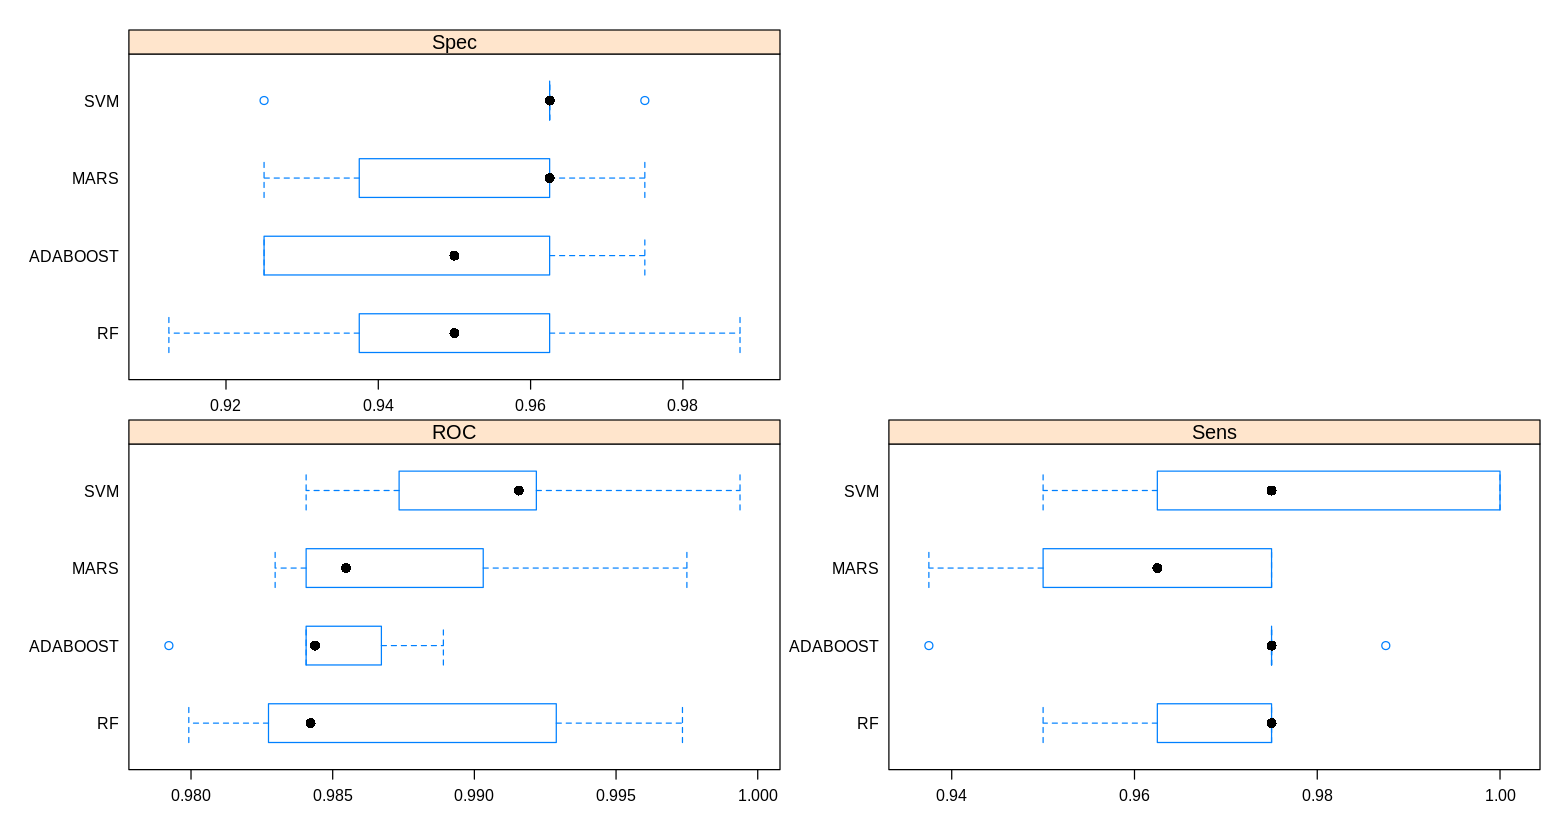

In [ ]:
# Plot box plots to visualize the models

scales = list(x=list(relation="free"), y=list(relation="free"))
bwplot(models_compare, scales=scales)

## Conclusions

From the above data analysis and modelling the Support Vector Machine performs better than all the the other models . To increase the predictive accuracy/power of the model, additional data may be needed.